# User-User Collaborative Filtering

The purpose of this project is the build a recommender system based on user-user collaborative filtering for the userID 290

In [1]:
import pandas as pd
import numpy as np
from surprise import Dataset

In [72]:
# this dataframe contains all the movie titles, which will be added to movielens dataframe later
df_title= pd.read_csv('Movie_Id_Titles')
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
movielens = Dataset.load_builtin('ml-100k')
movielens = pd.DataFrame(movielens.raw_ratings, columns = ['user_id', 'item_id', 'rating', 'timestamps'])
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     100000 non-null  object 
 1   item_id     100000 non-null  object 
 2   rating      100000 non-null  float64
 3   timestamps  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


### Data-Type

As you can see from the the information above, the data-type for user_id, item_id is object and data-type for rating is float64, we are going to change this to int64 for convenience and consistency

In [71]:
movielens

,user_id,item_id,rating,timestamps
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [73]:
# Changing data-type 
movielens[['user_id', 'item_id', 'rating']] = movielens[['user_id', 'item_id', 'rating']].astype('int64')
movielens.merge(df_title, on = 'item_id')
movielens.head()

,user_id,item_id,rating,timestamps
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### We are going to work with user_id, item_id and rating columns to build the recommender system

In [5]:
moviematrix = movielens.pivot_table(index = 'item_id', columns = 'user_id', values = 'rating')

In [6]:
moviematrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Correlation between users
cor = moviematrix.corr(method = 'pearson')

In [8]:
top30_users = cor[290].sort_values(ascending = False).head(31)
top30_users.drop(290, inplace = True) # Dropping user_id 290 since this is the target user
top30_users

user_id
451    1.000000
724    1.000000
651    1.000000
131    1.000000
863    1.000000
252    1.000000
520    1.000000
578    1.000000
362    1.000000
750    0.944911
209    0.942809
489    0.927173
462    0.912871
797    0.912871
799    0.904534
814    0.870388
444    0.866025
482    0.866025
134    0.866025
423    0.852803
742    0.840152
3      0.818182
310    0.788342
441    0.787296
590    0.759257
598    0.755929
212    0.752549
367    0.750000
104    0.748798
359    0.745957
Name: 290, dtype: float64

In [9]:
neighbors = moviematrix[top30_users.index.tolist()]
neighbors.head()

user_id,451,724,651,131,863,252,520,578,362,750,...,742,3,310,441,590,598,212,367,104,359
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [10]:
#neighbors.info()

In [11]:
len(neighbors)

1682

# Lets figure out how many movies user ID 451 and 290 have in common (movies that they both rated) since it has a correlation of 1

In [12]:
a = movielens[movielens['user_id']==451].sort_values(by = 'item_id', ascending = True)

In [13]:
b = movielens[movielens['user_id']==290].sort_values(by = 'item_id', ascending = True)

In [14]:
a1 = a['item_id'].tolist()
b1 = b['item_id'].tolist()
#b1

In [15]:
intersection = set(b1).intersection(a1)
#intersection

## It turns out they both rated only 3 movies, which are movie_id 243, 323, 683

In [16]:
print(a[a['item_id'] == 243][['rating','item_id']], "\n" ,
      a[a['item_id'] == 323][['rating','item_id']], "\n" ,
      a[a['item_id'] == 683][['rating','item_id']])

       rating  item_id
21612       4      243 
        rating  item_id
18714       4      323 
        rating  item_id
22471       1      683


In [17]:
print(b[b['item_id'] == 243][['rating','item_id']], '\n',
      b[b['item_id'] == 323][['rating','item_id']], '\n',
      b[b['item_id'] == 683][['rating','item_id']])

      rating  item_id
8792       3      243 
        rating  item_id
54145       3      323 
        rating  item_id
22027       2      683


## What does a correlation of 1 mean?

It means that the we have a perfect positive relationship between those users. This happened because the sample size was too small. To solve this issue, we are going to find all users that have rated at least 60 similar items as the user 290

In [18]:
moviematrix[290]

item_id
1       5.0
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1678    NaN
1679    NaN
1680    NaN
1681    NaN
1682    NaN
Name: 290, Length: 1682, dtype: float64

### Step 1: find all the items that user 290 rated
       

In [19]:
moviematrix[290].isnull().value_counts()

True     1532
False     150
Name: 290, dtype: int64

In [20]:
item_ids_rated_by_290 = movielens[movielens['user_id'] == 290]['item_id'].sort_values(ascending= True).tolist()
#item_ids_rated_by_290

In [21]:
user_id = moviematrix.columns.tolist()
len(user_id)

943

In [125]:
#common_290_users[1:5]

### Step 2: select all users that have rated the same items as user 290

In [24]:
common_290_users = []
for ids in user_id: # this is the list of all users
    col = moviematrix[ids]
    col_values= []
    for item in item_ids_rated_by_290:
        value = col.isnull()[item] # item rated by each user
        if value == False:
            col_values.append(item)
    common_290_users.append(col_values)
#common_290_users

### Step 3: Selecting all users that have rated at least 60 similar items as the user 290

In [25]:
e= [] #index of all users that have rated at least 60 similar items
for i in range(943):
    if len(set(item_ids_rated_by_290).intersection(common_290_users[i])) >60: #  
        e.append(i+1) # i + 1 because the items start at 1 and not 0
#e

In [26]:
similar_users_to_290 = moviematrix[e]
similar_users_to_290.head()

user_id,1,5,7,13,18,42,43,44,56,59,...,886,887,889,892,896,897,901,916,932,933
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,3.0,5.0,5.0,5.0,4.0,4.0,2.0,...,4.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0
2,3.0,3.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,3.0,4.0,3.0,NaN,NaN,3.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,3.0,NaN,5.0,5.0,3.0,NaN,4.0,NaN,NaN,4.0,...,3.0,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN,3.0
5,3.0,NaN,NaN,1.0,NaN,NaN,4.0,4.0,NaN,NaN,...,3.0,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN


In [27]:
# Setting the indices of similar_users_to_290 to item_ids for convenience
fixed_indices = []
for i in item_ids_rated_by_290:
    fixed_indices.append(i-1)

In [28]:
similar_users_to_290 = similar_users_to_290.iloc[fixed_indices]

In [29]:
similar_users_to_290.head()

user_id,1,5,7,13,18,42,43,44,56,59,...,886,887,889,892,896,897,901,916,932,933
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,3.0,5.0,5.0,5.0,4.0,4.0,2.0,...,4.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0
15,5.0,NaN,NaN,NaN,4.0,4.0,5.0,4.0,NaN,5.0,...,3.0,NaN,NaN,4.0,3.0,NaN,5.0,NaN,NaN,NaN
21,1.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22,4.0,NaN,5.0,4.0,5.0,NaN,NaN,4.0,5.0,4.0,...,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,NaN,5.0
28,4.0,NaN,5.0,5.0,3.0,5.0,4.0,NaN,5.0,5.0,...,4.0,5.0,4.0,4.0,2.0,4.0,5.0,4.0,NaN,4.0


### Step 4: Computing pearson correlation as the similarity metric
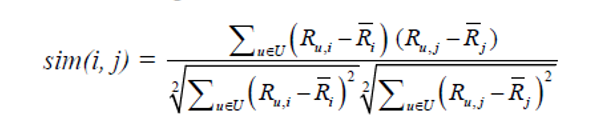

Here R(bar)_i and R(bar)_j are the mean rating value of two items i and j, respectively

In [30]:
similar_users_to_290.corr()[290].sort_values(ascending = False).head(30)

user_id
290    1.000000
70     0.573429
901    0.485320
275    0.467926
497    0.461244
536    0.454212
514    0.447698
896    0.443437
506    0.442695
178    0.429819
882    0.413911
807    0.411104
298    0.404048
311    0.402581
545    0.394200
267    0.381124
405    0.380030
130    0.373534
254    0.364362
682    0.355880
484    0.350943
618    0.343192
200    0.342605
378    0.339882
222    0.337611
716    0.336109
56     0.335035
886    0.323875
64     0.322026
577    0.317965
Name: 290, dtype: float64

### Step 5: Selecting top 30 neighbors

In [31]:
weight_neighbors290 = similar_users_to_290.corr()[290].sort_values(ascending = False).head(31)
weight_neighbors290.drop(labels = 290, inplace = True) # dropping user 290 
#weight_neighbors290

In [32]:
# user_id of the neighbors 

neighbor_user_ids = weight_neighbors290.index.tolist()
#neighbor_user_ids

In [34]:
neighbors_290_df = similar_users_to_290[neighbor_user_ids]

In [35]:
# mean of user id 290
mean_290 = similar_users_to_290[290].mean()

In [36]:
# mean of each user 
m_n = []
for i in neighbor_user_ids:
    m_n.append(neighbors_290_df[i].mean())
    
mean_neighbors_series = pd.Series(m_n, index = neighbor_user_ids)
#mean_neighbors_series

In [37]:
neighbors_290_df

user_id,70,901,275,497,536,514,896,506,178,882,...,618,200,378,222,716,56,886,64,577,87
item_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,4.0,4.0,5.0,5.0,4.0,NaN,4.0,5.0,...,4.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,NaN
15,3.0,5.0,NaN,NaN,NaN,4.0,3.0,NaN,5.0,5.0,...,3.0,4.0,4.0,3.0,NaN,NaN,3.0,NaN,3.0,NaN
21,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
22,NaN,5.0,3.0,5.0,5.0,4.0,5.0,NaN,5.0,NaN,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0
28,4.0,5.0,4.0,3.0,5.0,5.0,2.0,4.0,5.0,5.0,...,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1091,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [38]:
item_ids = neighbors_290_df.index.tolist()

### Step 5 : Rating Prediction
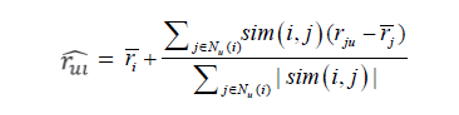

In [39]:
#neighbors_290_df.loc[15]
len(neighbors_290_df.loc[1])

30

In [40]:
neighbors_290_df.loc[1][70]

4.0

In [41]:
#The code for calculating the nominator portion of the equation by summing the product 
# of the similarity weight and rate difference

summation_nominator = []
for itemid in item_ids:
    row = (neighbors_290_df.loc[itemid].subtract(mean_neighbors_series).multiply(weight_neighbors290)).sum()
    summation_nominator.append(row)
    
summation_nominator_series = pd.Series(summation_nominator, index = item_ids)
#summation_nominator_series

In [42]:
# The code for calculating the denominator portion of the equation by summing the product 
# of the similarity weight of the users that rated each item

list_of_rows = []
for itemid in item_ids:
    row = neighbors_290_df.loc[itemid]
    l = []
    for userid in neighbor_user_ids:
        if neighbors_290_df.loc[itemid].isnull()[userid] == False:
            l.append(userid)
    list_of_rows.append(l)
    
summation_denominator = []
for i in range(150):
    l = list_of_rows[i]
    s = weight_neighbors290[l].sum()
    summation_denominator.append(s)

summation_denominator_series = pd.Series(summation_denominator, index = item_ids)
#summation_denominator_series

In [43]:
# The final score

pred = mean_290 + summation_nominator_series/summation_denominator_series
recommended_movies = pred.sort_values(ascending = False)
recommended_movies

174     4.340551
50      4.297746
172     4.256123
318     4.245133
64      4.236880
          ...   
120     1.468543
1336    0.868864
818          NaN
832          NaN
1285         NaN
Length: 150, dtype: float64

In [75]:
#neighbors_290_df.loc[1285]


In [114]:
user_290_movies = movielens[movielens['user_id'] == 290][['item_id','rating']].sort_values(by = 'rating', ascending=False)
user_290_movies= user_290_movies.merge(df_title, on = 'item_id')

In [115]:
user_290_movies.set_index(user_290_movies['item_id'], inplace = True)


In [116]:
user_290_movies['Score'] = recommended_movies

In [117]:
user_290_movies.drop(columns = 'item_id', inplace = True)

In [118]:
user_290_movies.sort_values(by = 'Score', ascending=False, inplace=False).head(10)

,rating,title,Score
item_id,,,
174,5,Raiders of the Lost Ark (1981),4.340551
50,5,Star Wars (1977),4.297746
172,5,"Empire Strikes Back, The (1980)",4.256123
318,4,Schindler's List (1993),4.245133
64,4,"Shawshank Redemption, The (1994)",4.236880
181,5,Return of the Jedi (1983),4.166434
98,4,"Silence of the Lambs, The (1991)",4.043595
22,5,Braveheart (1995),4.016896
651,3,Glory (1989),3.990893


In [122]:
#shifting columns
pop = user_290_movies.pop('title')
user_290_movies.insert(0, 'title', pop)

In [123]:
user_290_movies.sort_values(by = 'Score', ascending=False).head(10)

,title,rating,Score
item_id,,,
174,Raiders of the Lost Ark (1981),5,4.340551
50,Star Wars (1977),5,4.297746
172,"Empire Strikes Back, The (1980)",5,4.256123
318,Schindler's List (1993),4,4.245133
64,"Shawshank Redemption, The (1994)",4,4.236880
181,Return of the Jedi (1983),5,4.166434
98,"Silence of the Lambs, The (1991)",4,4.043595
22,Braveheart (1995),5,4.016896
651,Glory (1989),3,3.990893


# Let's pick a movie that user id 290 has not seen

In [85]:
item_ids_rated_by_290

[1,
 15,
 21,
 22,
 28,
 31,
 43,
 49,
 50,
 54,
 62,
 64,
 66,
 69,
 71,
 82,
 88,
 89,
 91,
 95,
 97,
 98,
 99,
 102,
 105,
 109,
 117,
 118,
 120,
 121,
 125,
 132,
 133,
 135,
 136,
 139,
 141,
 143,
 144,
 151,
 153,
 158,
 161,
 162,
 164,
 167,
 168,
 172,
 174,
 176,
 180,
 181,
 183,
 191,
 193,
 196,
 199,
 202,
 204,
 205,
 208,
 210,
 211,
 216,
 218,
 222,
 227,
 228,
 229,
 230,
 234,
 235,
 239,
 243,
 252,
 257,
 265,
 271,
 274,
 318,
 323,
 357,
 378,
 380,
 385,
 393,
 402,
 403,
 404,
 405,
 418,
 419,
 423,
 429,
 432,
 434,
 435,
 436,
 449,
 450,
 465,
 472,
 473,
 474,
 476,
 483,
 484,
 496,
 498,
 515,
 520,
 523,
 527,
 546,
 550,
 566,
 568,
 588,
 596,
 622,
 625,
 629,
 650,
 651,
 683,
 685,
 692,
 699,
 720,
 732,
 739,
 742,
 755,
 809,
 818,
 825,
 826,
 832,
 926,
 930,
 993,
 1013,
 1028,
 1035,
 1047,
 1060,
 1079,
 1091,
 1285,
 1336]

In [59]:
# So user id 290 has not seen the item_id number 2, let's see the rating for it 

In [60]:
item_2 = moviematrix.loc[2][neighbor_user_ids]
item_2

user_id
70     NaN
901    NaN
275    NaN
497    1.0
536    4.0
514    NaN
896    3.0
506    4.0
178    4.0
882    NaN
807    4.0
298    NaN
311    NaN
545    NaN
267    3.0
405    1.0
130    4.0
254    NaN
682    3.0
484    4.0
618    2.0
200    4.0
378    2.0
222    3.0
716    NaN
56     NaN
886    4.0
64     3.0
577    NaN
87     4.0
Name: 2, dtype: float64

In [61]:
row = (item_2.subtract(mean_neighbors_series).multiply(weight_neighbors290)).sum()

In [62]:
l = []
for userid in neighbor_user_ids:
    if item_2.isnull()[userid] == False:
            l.append(userid)

In [63]:
sm = weight_neighbors290[l].sum()

In [64]:
score = mean_290 + row/sm

In [65]:
score

2.7040036536452723

# Conclusion:

The rating for item_id number 2 is 2.70, which is obtained based on other users with similar taste as user_id 290. 